**SUPERMARKET SALES ANALYSIS**

**IMPORTING LIBRARIES**

In [16]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

**SEE THE DATA**

In [18]:
df = pd.read_csv('/content/supermarket_sales - Sheet1.csv')
df.head()

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating
0,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,1/5/2019,13:08,Ewallet,522.83,4.761905,26.1415,9.1
1,226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,3/8/2019,10:29,Cash,76.40,4.761905,3.8200,9.6
2,631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,3/3/2019,13:23,Credit card,324.31,4.761905,16.2155,7.4
3,123-19-1176,A,Yangon,Member,Male,Health and beauty,58.22,8,23.2880,489.0480,1/27/2019,20:33,Ewallet,465.76,4.761905,23.2880,8.4
4,373-73-7910,A,Yangon,Normal,Male,Sports and travel,86.31,7,30.2085,634.3785,2/8/2019,10:37,Ewallet,604.17,4.761905,30.2085,5.3


**DATA CLEANUP**

In [22]:
df.dtypes

Invoice ID                  object
Branch                      object
City                        object
Customer type               object
Gender                      object
Product line                object
Unit price                 float64
Quantity                     int64
Tax 5%                     float64
Total                      float64
Date                        object
Time                        object
Payment                     object
cogs                       float64
gross margin percentage    float64
gross income               float64
Rating                     float64
dtype: object

In [26]:
df.isnull().any()

Invoice ID                 False
Branch                     False
City                       False
Customer type              False
Gender                     False
Product line               False
Unit price                 False
Quantity                   False
Tax 5%                     False
Total                      False
Date                       False
Time                       False
Payment                    False
cogs                       False
gross margin percentage    False
gross income               False
Rating                     False
dtype: bool

**OVERVIEW**

In [34]:
df.columns

Index(['Invoice ID', 'Branch', 'City', 'Customer type', 'Gender',
       'Product line', 'Unit price', 'Quantity', 'Tax 5%', 'Total', 'Date',
       'Time', 'Payment', 'cogs', 'gross margin percentage', 'gross income',
       'Rating'],
      dtype='object')

In [50]:
df.shape

(1000, 17)

In [93]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 17 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Invoice ID               1000 non-null   object 
 1   Branch                   1000 non-null   object 
 2   City                     1000 non-null   object 
 3   Customer type            1000 non-null   object 
 4   Gender                   1000 non-null   object 
 5   Product line             1000 non-null   object 
 6   Unit price               1000 non-null   float64
 7   Quantity                 1000 non-null   int64  
 8   Tax 5%                   1000 non-null   float64
 9   Total                    1000 non-null   float64
 10  Date                     1000 non-null   object 
 11  Time                     1000 non-null   object 
 12  Payment                  1000 non-null   object 
 13  cogs                     1000 non-null   float64
 14  gross margin percentage  

In [94]:
df.describe()

,Unit price,Quantity,Tax 5%,Total,cogs,gross margin percentage,gross income,Rating
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000,1000.00000
mean,55.672130,5.510000,15.379369,322.966749,307.58738,4.761905,15.379369,6.97270
std,26.494628,2.923431,11.708825,245.885335,234.17651,0.000000,11.708825,1.71858
min,10.080000,1.000000,0.508500,10.678500,10.17000,4.761905,0.508500,4.00000
25%,32.875000,3.000000,5.924875,124.422375,118.49750,4.761905,5.924875,5.50000
50%,55.230000,5.000000,12.088000,253.848000,241.76000,4.761905,12.088000,7.00000
75%,77.935000,8.000000,22.445250,471.350250,448.90500,4.761905,22.445250,8.50000
max,99.960000,10.000000,49.650000,1042.650000,993.00000,4.761905,49.650000,10.00000


**PLOTS**

*The percentage of different types of products in Supermarket*

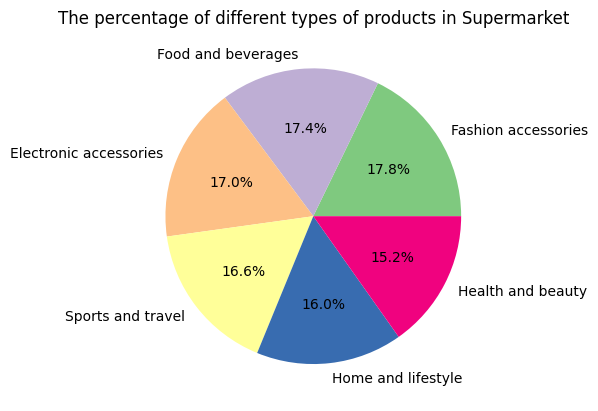

In [163]:
labels = df['Product line'].value_counts().index
colors = sns.color_palette(palette='Accent')
plt.pie(x=df['Product line'].value_counts().values, labels=labels, colors=colors, autopct="%1.1f%%")
plt.title('The percentage of different types of products in Supermarket')
plt.show()


*   The highest stock of Fashion Accessories and the lowest stock of Health and Beauty products.

*Taxes on different product lines*

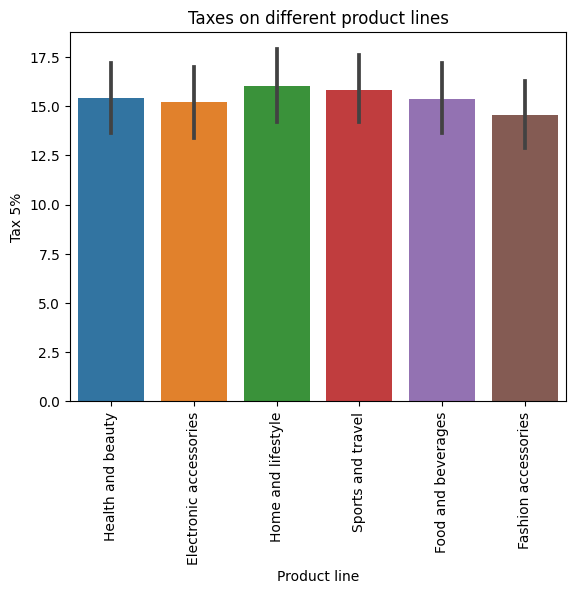

In [164]:
ax = sns.barplot(x=df['Product line'],y=df['Tax 5%'], data=df)
ax.set_xticklabels(ax.get_xticklabels(),rotation=90)
plt.title('Taxes on different product lines')
plt.show()

* Home and Lifestyle product line has the highest tax.
* Fashion Accessories product line has the lowest tax.

*The price per item of each product line*

<ipython-input-142-7d2951b98322>:2: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels(), rotation=90)


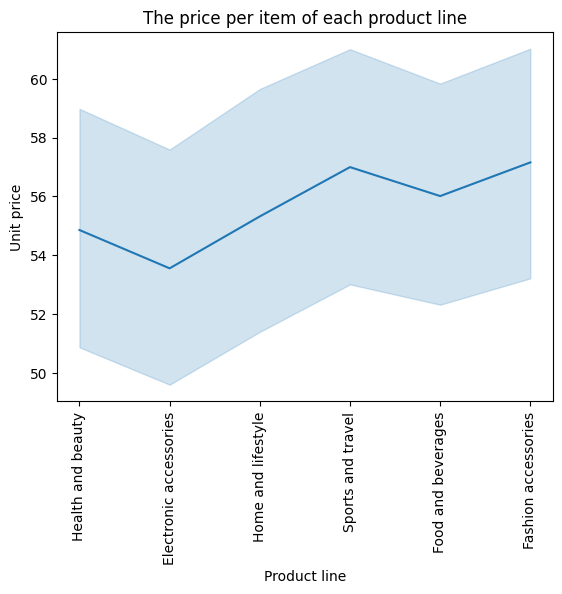

In [142]:
ax = sns.lineplot(x=df['Product line'], y=df['Unit price'], data=df)
ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
plt.title('The price per item of each product line')
plt.show()

*  Sports and Travel products have the highest Unit Price and Electronic Accessories have the lowest price.

*Quantity of products sold from each product line*

<ipython-input-143-975e87b733d2>:2: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels(),rotation=90)


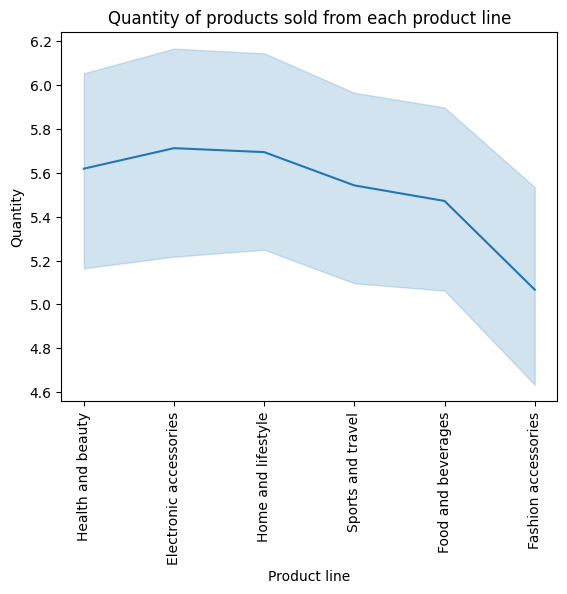

In [143]:
ax = sns.lineplot(x=df['Product line'],y=df['Quantity'],data=df)
ax.set_xticklabels(ax.get_xticklabels(),rotation=90)
plt.title('Quantity of products sold from each product line')
plt.show()

* The highest selling product lines is Electronic Accessories, then goes Home and Lifestyle.
*   The lowest selling product line is the Fashion Accessories.

*Count of Different Gender Visitors from Different Cities*

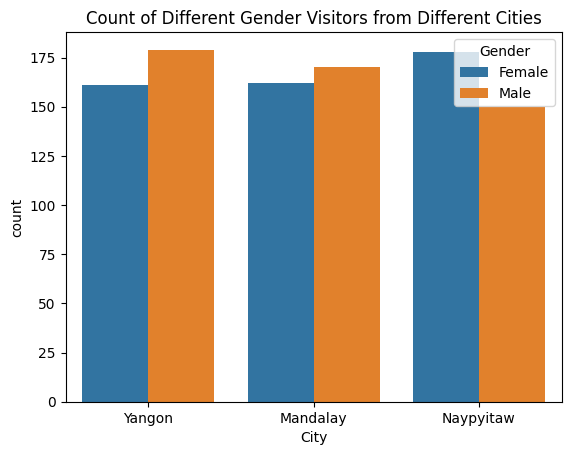

In [155]:
ax = sns.countplot(x=df['City'],data=df,order=df['City'].value_counts().index, hue=df['Gender'])
plt.title('Count of Different Gender Visitors from Different Cities')
plt.legend(title='Gender')
plt.show()


*   Most number of Females are from Naypyitaw and most number of Males are from Yangon.
*   Lowest number of Females are from Mandalay and lowest number of Males are from Naypyitaw.

*Count of Different Types of Payment Methods used by Different Genders*

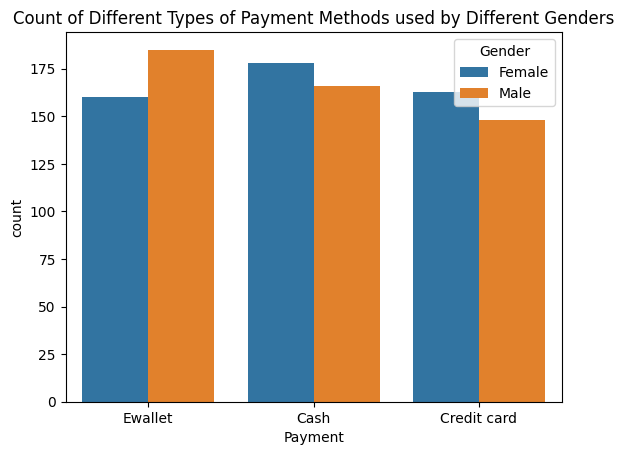

In [162]:
ax = sns.countplot(x=df['Payment'],data=df,hue=df['Gender'])
plt.title('Count of Different Types of Payment Methods used by Different Genders')
plt.legend(title='Gender')
plt.show()

*   Ewallet is used mostly by Males and Cash Payment is used mostly by Females.
*   And Credit Card being the lowest used by Males and Ewallet is the lowest used by Females.

**HYPOTHESIS**

My hypothesis is that Rating of different product lines affects more on females than on males choice, while buying products.

*Rating of Different Product Lines by Different Genders*

<ipython-input-178-f0c0125ca10c>:2: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels(),rotation=90)


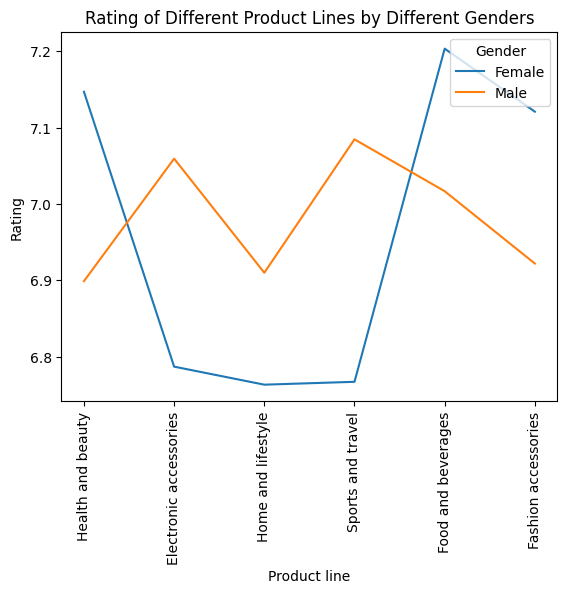

In [178]:
ax = sns.lineplot(x=df['Product line'],y=df['Rating'],data=df,hue=df['Gender'],err_style=None)
ax.set_xticklabels(ax.get_xticklabels(),rotation=90)
plt.title('Rating of Different Product Lines by Different Genders')
plt.legend(title='Gender',loc='upper right')
plt.show()

*   Female most rated Food and Beverage Products, then Health and Beauty Products.
*   Male most rated Sports and Travel Products then Electronic Accessories Products.

*Number of Products bought by Different Genders from Different Product Lines*

<ipython-input-179-77462d2cb389>:2: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels(),rotation=90)


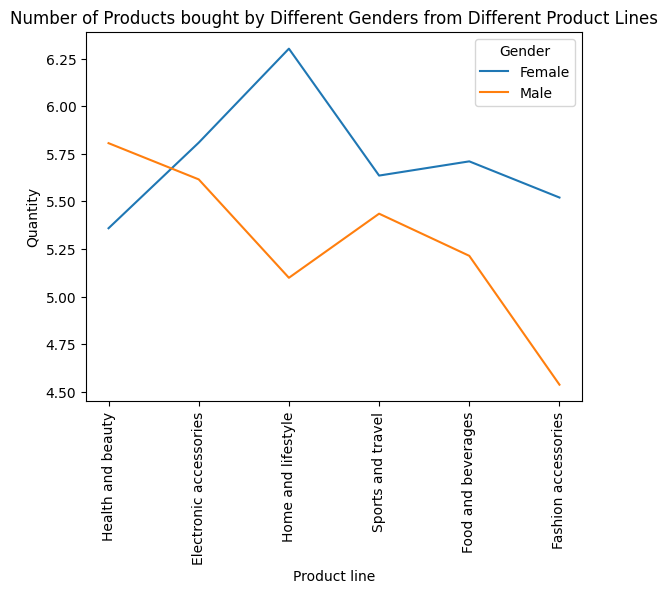

In [179]:
ax = sns.lineplot(x=df['Product line'],y=df['Quantity'],data=df,hue=df['Gender'],err_style=None)
ax.set_xticklabels(ax.get_xticklabels(),rotation=90)
plt.title('Number of Products bought by Different Genders from Different Product Lines')
plt.legend(title='Gender',loc='upper right')
plt.show()

* Female mostly buy Home and Lifestyle Products, then followed by Food and Beverages Product.
*   Male mostly buy Health and Beauty Products, then followed by Electronics Accessories.



*Total Amount Spend on Different Product Lines by Different Genders*

<ipython-input-181-b29063a45c68>:2: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels(),rotation=90)


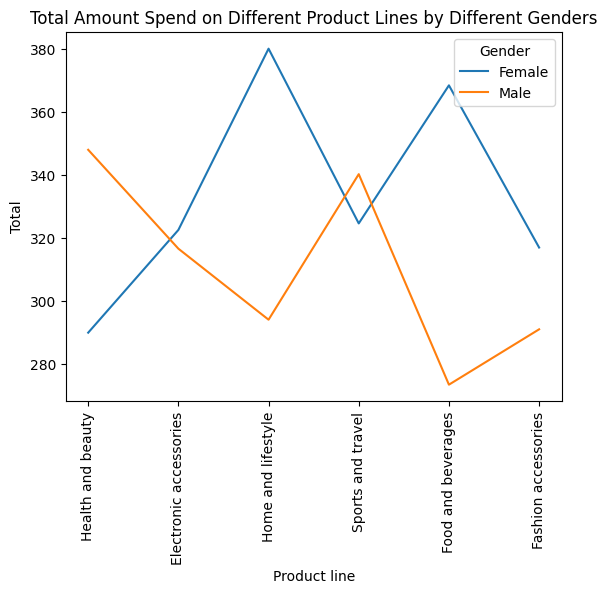

In [181]:
ax = sns.lineplot(x=df['Product line'],y=df['Total'],data=df,hue=df['Gender'],err_style=None)
ax.set_xticklabels(ax.get_xticklabels(),rotation=90)
plt.title('Total Amount Spend on Different Product Lines by Different Genders')
plt.legend(title='Gender',loc='upper right')
plt.show()

* Female spend most money on Home and Lifestyle Products and least money on Health and Beauty Products.  
*  Male spend most money on Health and Beauty Products and least money on Food and Beverage Products.

So the hypothesis "Rating of different product lines affects more on females than on males choice, while buying products." is false. Females spend much money on high rated products (7.2) food and beverages, but males also spend much money on  high rated products in their area sport and travel.



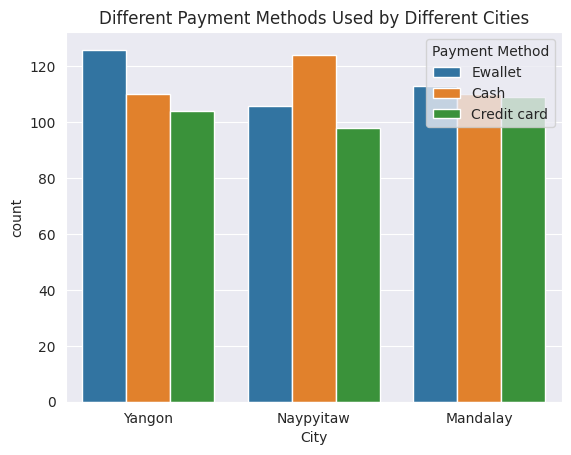

In [ ]:
ax = sns.countplot(x=df['City'],data=df,hue=df['Payment'])
plt.legend(title='Payment Method',loc='upper right')
plt.title('Different Payment Methods Used by Different Cities')
plt.show()

Conclusion
*   CountPlot shows the Type of Payment Methods used by Customers of Different Cities.
*   We can see that Ewallet Method is mostly used in Yangon.
*   Hypothesis is false: Cash is mostly used in Naypyitaw.
*   Credit Card Method is mostly used in Mandalay.

*Gross Income from Different Product Lines in Different Cities*

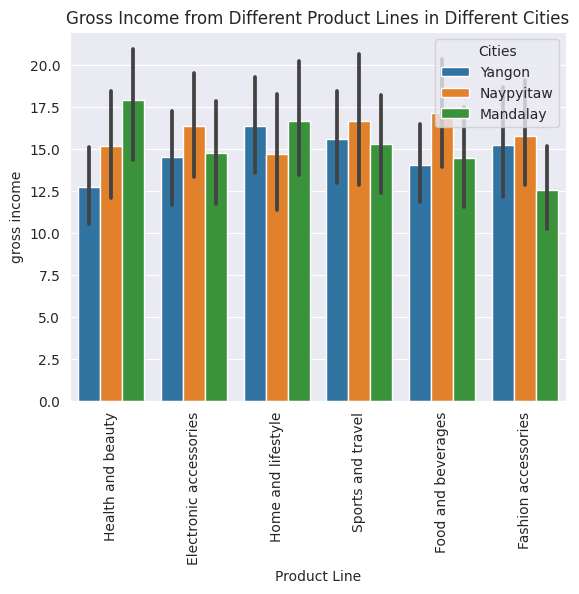

In [ ]:
ax = sns.barplot(x=df['Product line'],y=df['gross income'],data=df,hue=df['City'])
ax.set_xticklabels(ax.get_xticklabels(),rotation=90)
plt.xlabel('Product Line')
plt.title('Gross Income from Different Product Lines in Different Cities')
plt.legend(title='Cities',loc='upper right')
plt.show()

 Conclusion
*   Bar graph shows the Gross Income from Different Product Lines in Different Cities.
*   Here we can see that Health and Beauty Products has the highest gross income in Mandalay.
*   Electronic Accessories has the highest gross income in Naypyitaw.
*   Home and Lifestyle Products has the highest gross income in Manndalay.
*   Sports and Travel Products has the highest income in Naypyitaw.
*   Food and Beverages Products has the highest income in Naypyitaw.
*   Fashion Accessories Products has the highest income in Naypyitaw.
